<a href="https://colab.research.google.com/github/Metodoscomputacionales1/Metodos1_PedroAngarita_SimonUribe/blob/main/Tarea6/Ejercicio_7_de_muestreo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [377]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
from scipy import integrate
from scipy.stats import poisson
from scipy.special import factorial
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
import pandas as pd

Mounted at /content/drive


In [378]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/Datos/")
!ls

datos.csv	    Exponencial.dat  Matematicas.txt	 MinimosCuadratico.txt
DatosRegresion.csv  Gaussiano.csv    MediaMovilData.csv  MinimosLineal.txt


In [379]:
file = '/content/drive/MyDrive/Colab Notebooks/Datos/Matematicas.txt'
file

'/content/drive/MyDrive/Colab Notebooks/Datos/Matematicas.txt'

In [380]:
data = pd.read_csv(file,sep=',')
X=data["x"]
X

,x
0,68
1,84
2,75
3,82
4,68
...,...
75,63
76,76
77,75
78,85


(array([ 2.,  6., 10.,  6., 12., 21.,  5.,  9.,  2.,  7.]),
 array([53. , 57.4, 61.8, 66.2, 70.6, 75. , 79.4, 83.8, 88.2, 92.6, 97. ]),
 <BarContainer object of 10 artists>)

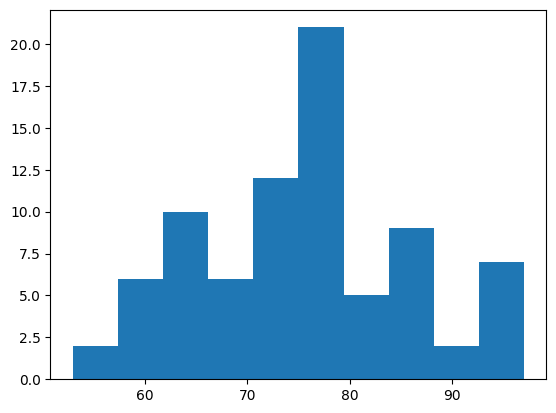

In [381]:
plt.hist(X)

In [382]:
np.mean(X)

75.25

In [383]:
np.percentile(X,50)

75.0

In [384]:
frec=np.unique(X, return_counts=True)

In [385]:
FrecAcum=np.cumsum(frec[0])
FrecAcum

array([  53,  110,  169,  229,  290,  352,  415,  480,  546,  613,  681,
        750,  821,  893,  966, 1040, 1115, 1191, 1268, 1346, 1425, 1505,
       1586, 1668, 1751, 1835, 1920, 2006, 2093, 2181, 2270, 2360, 2453,
       2547, 2642, 2738, 2835])

In [386]:
Prob=FrecAcum/np.sum(frec[0])
Prob

array([0.01869489, 0.03880071, 0.05961199, 0.08077601, 0.10229277,
       0.12416226, 0.14638448, 0.16931217, 0.19259259, 0.21622575,
       0.24021164, 0.26455026, 0.28959436, 0.31499118, 0.34074074,
       0.36684303, 0.39329806, 0.42010582, 0.44726631, 0.47477954,
       0.5026455 , 0.5308642 , 0.55943563, 0.58835979, 0.61763668,
       0.64726631, 0.67724868, 0.70758377, 0.7382716 , 0.76931217,
       0.80070547, 0.8324515 , 0.86525573, 0.8984127 , 0.9319224 ,
       0.96578483, 1.        ])

75.25615

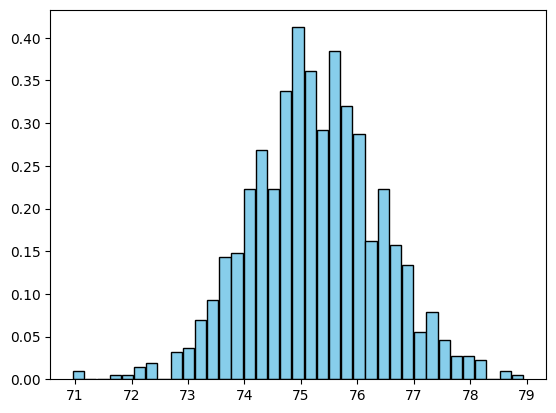

In [387]:
import random as rand
bootmeans=[]
for i in range(1000):
  Boot=rand.choices(X,k=len(X))
  for j in Boot:
    bootmean=(np.sum(Boot)/len(Boot))
    bootmeans.append(bootmean)
plt.hist(bootmeans, bins=len(frec[1]), width=0.2, color="skyblue",ec="k", density=True)
np.mean(bootmeans)

In [388]:
def likelihood (p, x):
  mean,std =p
  return (1/np.sqrt(2*np.pi*std**2))*np.exp(-(x-mean)**2/(2*std**2))

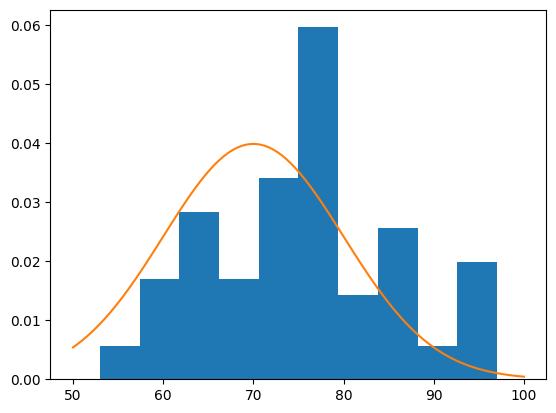

In [389]:
plt.hist(X, density=True)
x=np.linspace(50,100,100)
p=[70,10]
plt.plot(x, likelihood(p,x))

In [390]:
import scipy.optimize as opt
def Jointlikelihood(p,x):
  return -np.sum(np.log(likelihood(p,x)))

In [391]:
p0=p
p1=opt.minimize(Jointlikelihood,p0,args=(X)).x
print("Media")
print(p1[0])
print("Desviacion")
print(p1[1])

Media
75.25000457568761
Desviacion
10.309585875495115


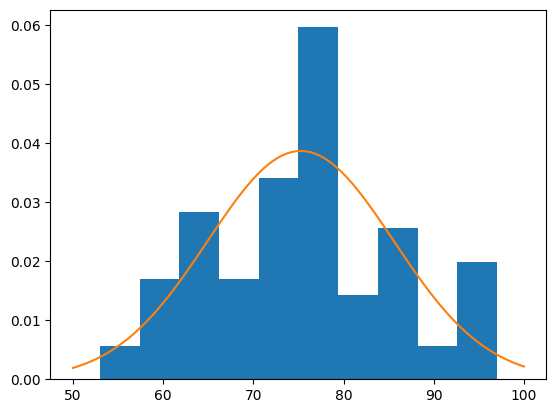

In [392]:
plt.hist(X, density=True)
x=np.linspace(50,100,100)
plt.plot(x, likelihood(p1,x))

In [393]:
p0=p
p2=opt.minimize(Jointlikelihood,p0,args=(bootmeans)).x
print("Media")
print(p2[0])
print("Desviacion")
print(p2[1])

Media
75.25614997887952
Desviacion
1.1367945548451743


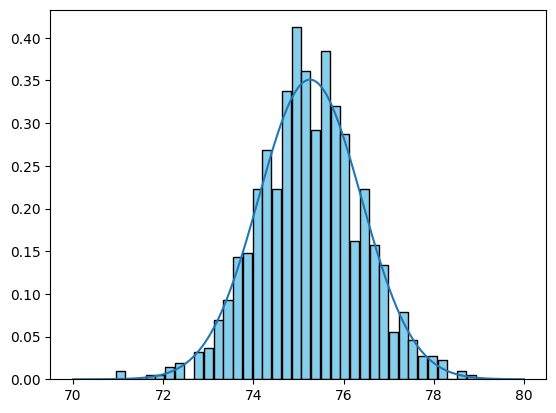

In [394]:
plt.hist(bootmeans, bins=len(frec[1]), width=0.2, color="skyblue",ec="k", density=True)
x=np.linspace(70,80,80000)
plt.plot(x, likelihood(p2,x))

In [395]:
bit=np.sort(bootmeans)
bit

array([70.9625, 70.9625, 70.9625, ..., 78.95  , 78.95  , 78.95  ])

In [396]:
def probabi(boot):
  Proba=[]
  priori=0
  acum=0
  for i in range(len(boot)):
    priori+=(boot[i]/np.sum(boot))
    acum+=(boot[i]/len(boot))
    Proba.append(priori)
  return Proba, acum
probabi(bit)[0][-1]

0.9999999999999599

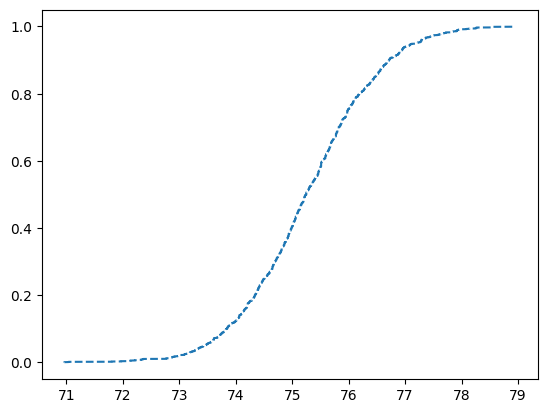

In [397]:
plt.plot(bit, probabi(bit)[0], linestyle="--")

In [398]:
mediana=probabi(bit)[1]
mediana

75.25614999998936

In [399]:
print("Mediana bootstrap:")
print(mediana)
print("Mediana Gaussiana")
p2[0]

Mediana bootstrap:
75.25614999998936
Mediana Gaussiana


75.25614997887952

In [400]:
#Ambas aproximaciones son muy cercanas entre si tenien ambas una precisoon destacable de 1e-6
#sin embargo ambas fallan en el orden de 1e-2 ya que el resultado obtenido por np.mean y la gausiana real sobre los datos fue de 75.25 ademas de obtener un resultado diferente cada vez debido a la tecnica de remuestreo bootsraping
#vale aclarar que el resultado ya con 0.25 bien, fue obtenido despues de varias pruebas con resultados diferentes debido a bootsraping